In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gsw
import xarray as xr
import toolbox
import cartopy as cart
import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob
import matplotlib

In [2]:
shp_dict = {}
files = glob('../data/ne_10m_bathymetry_all/*.shp')
assert len(files) > 0
files.sort()
for f in files:
    depth = f.split('_')[-1].split('.')[0]
    # depth = '-' + f.split('_')[-1].split('.')[0]
    # depths.append(depth)
    nei = cart.io.shapereader.Reader(f)
    shp_dict[depth] = nei

depths = [d for d in shp_dict.keys()][::-1]
colors = sns.mpl_palette('cmo.ice_r', n_colors=8)
cmap   = sns.mpl_palette('cmo.ice', n_colors=8, as_cmap=True)

# fragmetation time scale 100

In [3]:
sim = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/frag_runs/H592Q6.nc')
diff = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/frag_runs/QM2PXY.nc')

In [4]:
sim

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 3651)
Dimensions without coordinates: traj, obs
Data variables: (12/13)
    trajectory        (traj, obs) float64 0.0 0.0 0.0 ... 9.999e+03 9.999e+03
    time              (traj, obs) datetime64[ns] 2019-12-31T12:00:00 ... 2010...
    lat               (traj, obs) float64 -32.16 -32.13 -32.1 ... -42.82 -42.89
    lon               (traj, obs) float64 6.289 6.328 6.369 ... -29.75 -29.93
    z                 (traj, obs) float64 5e+03 5.011e+03 ... 9.301 8.957
    cons_temperature  (traj, obs) float32 0.7251 0.7342 0.7413 ... 13.82 13.78
    ...                ...
    mld               (traj, obs) float32 30.64 32.95 50.49 ... 70.54 58.08
    Kz                (traj, obs) float32 1.482e-05 1.477e-05 ... 0.04048
    radius            (traj, obs) float32 5e-08 5e-08 ... 2.032e-05 2.032e-05
    volume            (traj, obs) float32 5.236e-22 5.236e-22 ... 3.514e-14
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... 1.026e+03
    v_s               (traj, obs) float32 0.0 1.865e-09 1.865e-09 ... 0.0 0.0
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        v2.3.0-71-g202ef087
    parcels_mesh:           spherical

In [5]:
diff

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 3651)
Dimensions without coordinates: traj, obs
Data variables: (12/13)
    trajectory        (traj, obs) float64 0.0 0.0 0.0 ... 9.999e+03 9.999e+03
    time              (traj, obs) datetime64[ns] 2019-12-31T12:00:00 ... 2010...
    lat               (traj, obs) float64 -32.16 -32.13 -32.1 ... -34.39 -34.39
    lon               (traj, obs) float64 6.289 6.328 6.369 ... 9.33 9.33 9.33
    z                 (traj, obs) float64 5e+03 5.015e+03 ... 5.108e+03
    cons_temperature  (traj, obs) float32 0.7251 0.7342 0.7413 ... 0.0 0.0 0.0
    ...                ...
    mld               (traj, obs) float32 30.64 32.95 50.49 ... 29.01 15.65
    Kz                (traj, obs) float32 1.482e-05 1.477e-05 ... 0.0 0.0
    radius            (traj, obs) float32 5e-08 5e-08 ... 0.0005161 0.0005161
    volume            (traj, obs) float32 5.236e-22 5.236e-22 ... 5.757e-10
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... 1.002e+03
    v_s               (traj, obs) float32 0.0 3.808e-10 3.808e-10 ... 0.0 0.0
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        v2.3.0-71-g202ef087
    parcels_mesh:           spherical

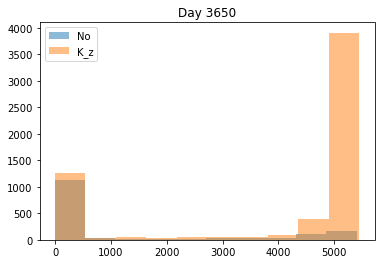

In [6]:
N=3650
plt.hist(sim['z'][:, N],label='No', alpha=0.5)
plt.hist(diff['z'][:, N], label='K_z', alpha=0.5)
plt.title(f'Day {N}')
plt.legend()

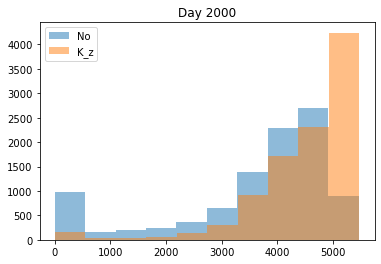

In [7]:
N=2000
plt.hist(sim['z'][:, N],label='No', alpha=0.5)
plt.hist(diff['z'][:, N], label='K_z', alpha=0.5)
plt.title(f'Day {N}')
plt.legend()

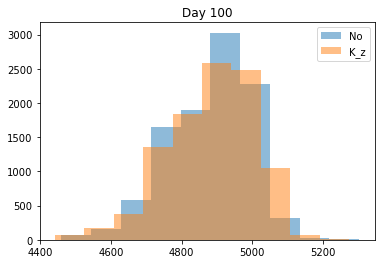

In [8]:
N=100
plt.hist(sim['z'][:, N],label='No', alpha=0.5)
plt.hist(diff['z'][:, N], label='K_z', alpha=0.5)
plt.title(f'Day {N}')
plt.legend()

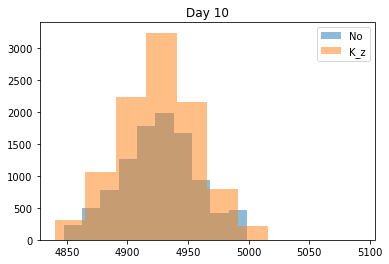

In [9]:
N=10
plt.hist(sim['z'][:, N],label='No', alpha=0.5)
plt.hist(diff['z'][:, N], label='K_z', alpha=0.5)
plt.title(f'Day {N}')
plt.legend()

Text(0.5, 1.0, '3650 days no diffusion')

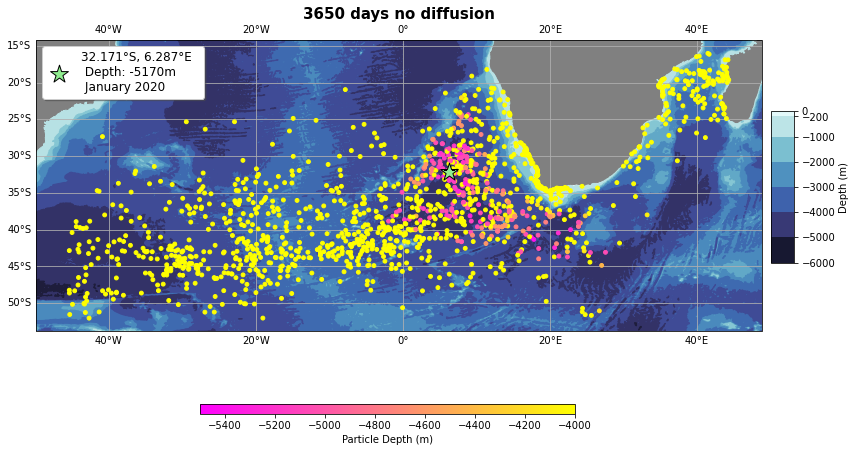

In [10]:
max_depth = -5500
min_depth = -4000

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
im = ax.scatter(sim['lon'][:,-1], sim['lat'][:,-1], zorder=4, 
           c=-sim['z'][:,-1], s=15, cmap='spring', vmax=max_depth, vmin=min_depth)
ax.legend(loc='upper left', shadow=True, fontsize=12)

bar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle Depth (m)')
ax.set_title('3650 days no diffusion', fontsize=15, weight='bold')
# plt.savefig('../figs/5170m_passive.png')

Text(0.5, 1.0, '3650 days with diffusion')

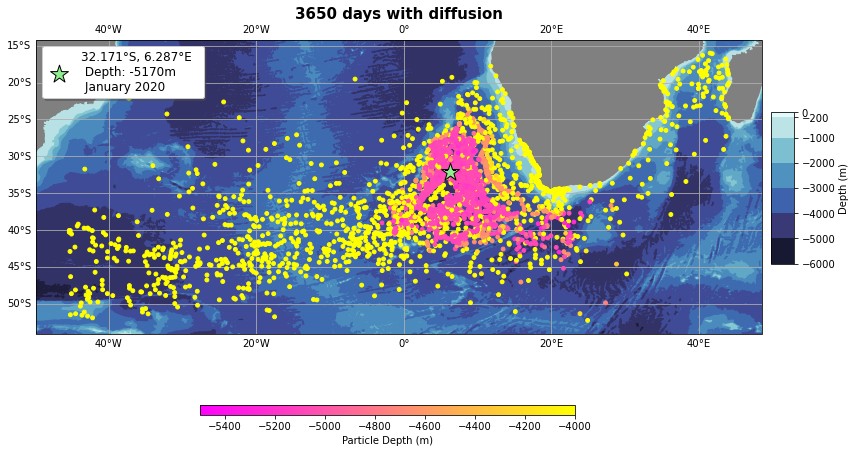

In [11]:
max_depth = -5500
min_depth = -4000

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
im = ax.scatter(diff['lon'][:,-1], diff['lat'][:,-1], zorder=4, 
           c=-diff['z'][:,-1], s=15, cmap='spring', vmax=max_depth, vmin=min_depth)
ax.legend(loc='upper left', shadow=True, fontsize=12)

bar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle Depth (m)')
ax.set_title('3650 days with diffusion', fontsize=15, weight='bold')
# plt.savefig('../figs/5170m_passive.png')

# FRagmentation